In [1]:
'''ONLY RUN THIS CELL ONCE OR THE PATH WILL CHANGE AND YOU WILL HAVE TO RESTART AND RUN ALL'''
import os
os.path.abspath(os.curdir)
os.chdir("..")
REPO_PATH = os.path.abspath(os.curdir)
FIGURE_PATH = REPO_PATH + '/reports/figures/'
print(FIGURE_PATH)

/Users/connormcdonald/Desktop/Masters/MIT808/mit808-2022-project-significant-outliers-1/reports/figures/


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from functions import *

In [3]:
# stations = read_from_drive('https://drive.google.com/file/d/1lyYAS0Zx602GIlYOgnFxVBiyOrRxUJPW/view?usp=sharing')
stations = pd.read_csv('/Users/connormcdonald/Desktop/Masters/MIT808/local_data/sites_per_year.csv')
stations.head()

'''QUERY USED:

SELECT
COUNT(DISTINCT(clim_no)),
EXTRACT(YEAR FROM record_date) AS year, 
FROM `icfr-information-hub-io.weather.1950_2019_v3` 
GROUP BY year
ORDER BY year ASC

'''

'QUERY USED:\n\nSELECT\nCOUNT(DISTINCT(clim_no)),\nEXTRACT(YEAR FROM record_date) AS year, \nFROM `icfr-information-hub-io.weather.1950_2019_v3` \nGROUP BY year\nORDER BY year ASC\n\n'

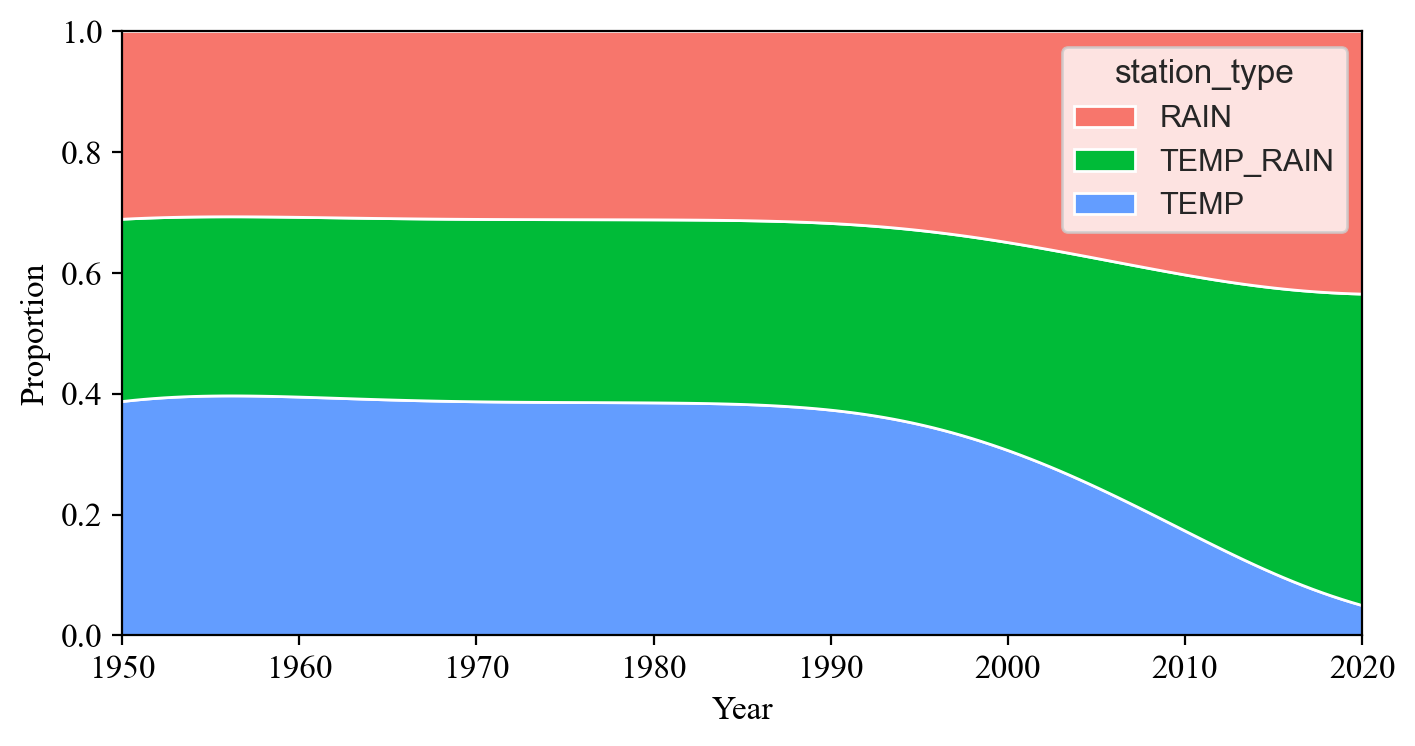

In [4]:
c = ['#f7766c', '#00bb38', '#639dff']
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.dpi"] = 200
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = "Times New Roman"
# plt.title('Station Types By Year')
plt.ylabel('Proportion')
plt.xlabel('Year')
sns.set(style="whitegrid")
sns.kdeplot(data=stations, x="year", hue="station_type", palette=c, common_norm=False, multiple="fill", alpha=1)
plt.xlim(1950, 2020)
plt.savefig(f'{FIGURE_PATH}stations_per_year.png',bbox_inches='tight',pad_inches = 0)

In [5]:
# temp= read_from_drive('https://drive.google.com/file/d/1aeL8Ui7NsInr7bSjJY7JCexvdOBOUCrr/view?usp=sharing')
temp = pd.read_csv('/Users/connormcdonald/Desktop/Masters/MIT808/local_data/temp_analysis.csv')
temp.head()


,avg_max_temp,avg_min_temp,month,year
0,27.930734,16.047463,1,1950
1,28.886207,16.843775,2,1950
2,27.612601,15.842091,3,1950
3,24.248469,12.299630,4,1950
4,21.654666,8.447018,5,1950


In [6]:
temp.set_index('month', inplace=True)

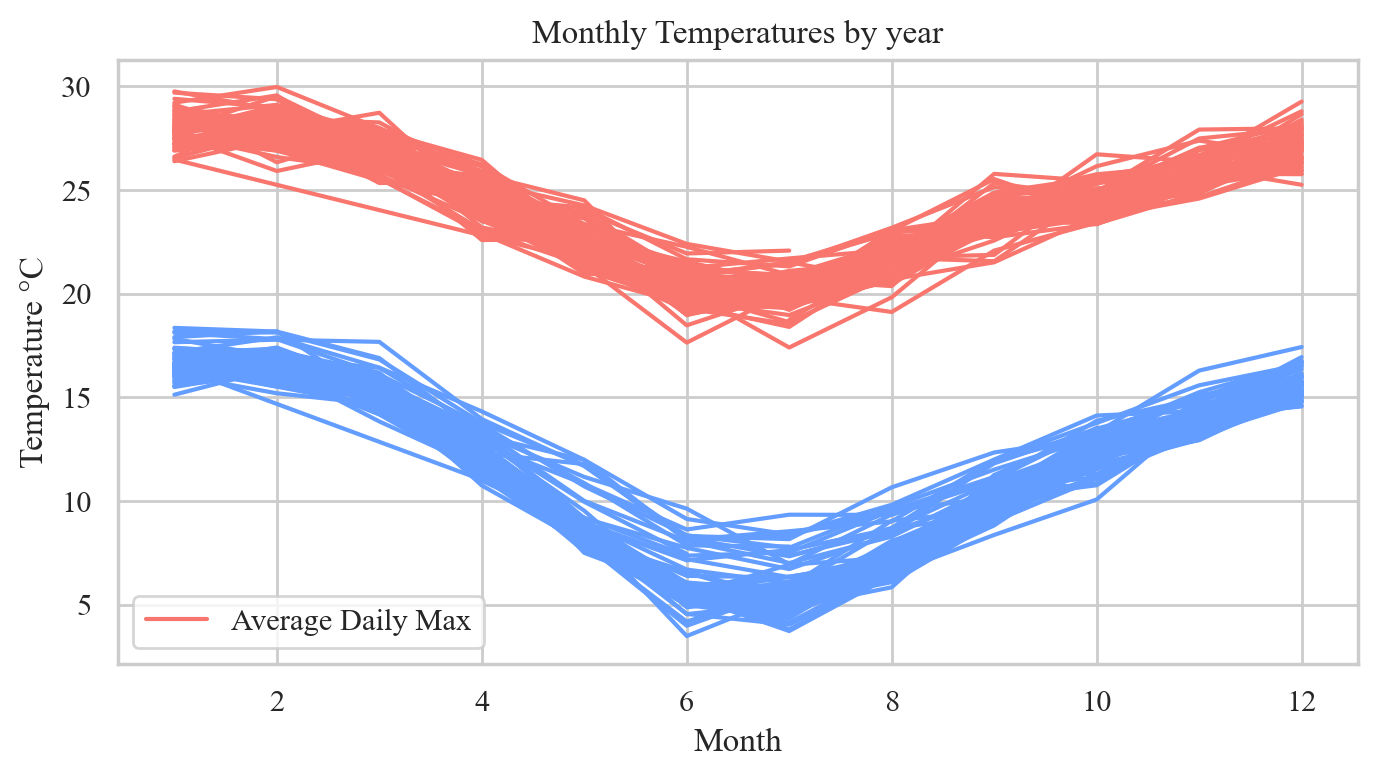

In [7]:
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams.update({'font.size': 12})
red_patch = mpatches.Patch(color='#f8766d', label='Average Daily Max')
blue_patch = mpatches.Patch(color='#629dff', label='Average Daily Min')
plt.legend(handles=[red_patch, blue_patch])
temp.groupby('year')['avg_max_temp'].plot(legend=False, color = '#f8766d')
temp.groupby('year')['avg_min_temp'].plot(legend=False, color = '#629dff')
plt.title('Monthly Temperatures by year')
plt.ylabel('Temperature °C')
plt.xlabel('Month')
plt.savefig(f'{FIGURE_PATH}seasonal_temp.png',bbox_inches='tight',pad_inches = 0)


In [8]:
# temp= read_from_drive('https://drive.google.com/file/d/1aeL8Ui7NsInr7bSjJY7JCexvdOBOUCrr/view?usp=sharing')
temp = pd.read_csv('/Users/connormcdonald/Desktop/Masters/MIT808/local_data/temp_analysis.csv')
temp.head()

,avg_max_temp,avg_min_temp,month,year
0,27.930734,16.047463,1,1950
1,28.886207,16.843775,2,1950
2,27.612601,15.842091,3,1950
3,24.248469,12.299630,4,1950
4,21.654666,8.447018,5,1950


In [9]:
max_temp = temp.groupby('month', as_index=False)['avg_max_temp'].mean()
min_temp = temp.groupby('month', as_index=False)['avg_min_temp'].mean()

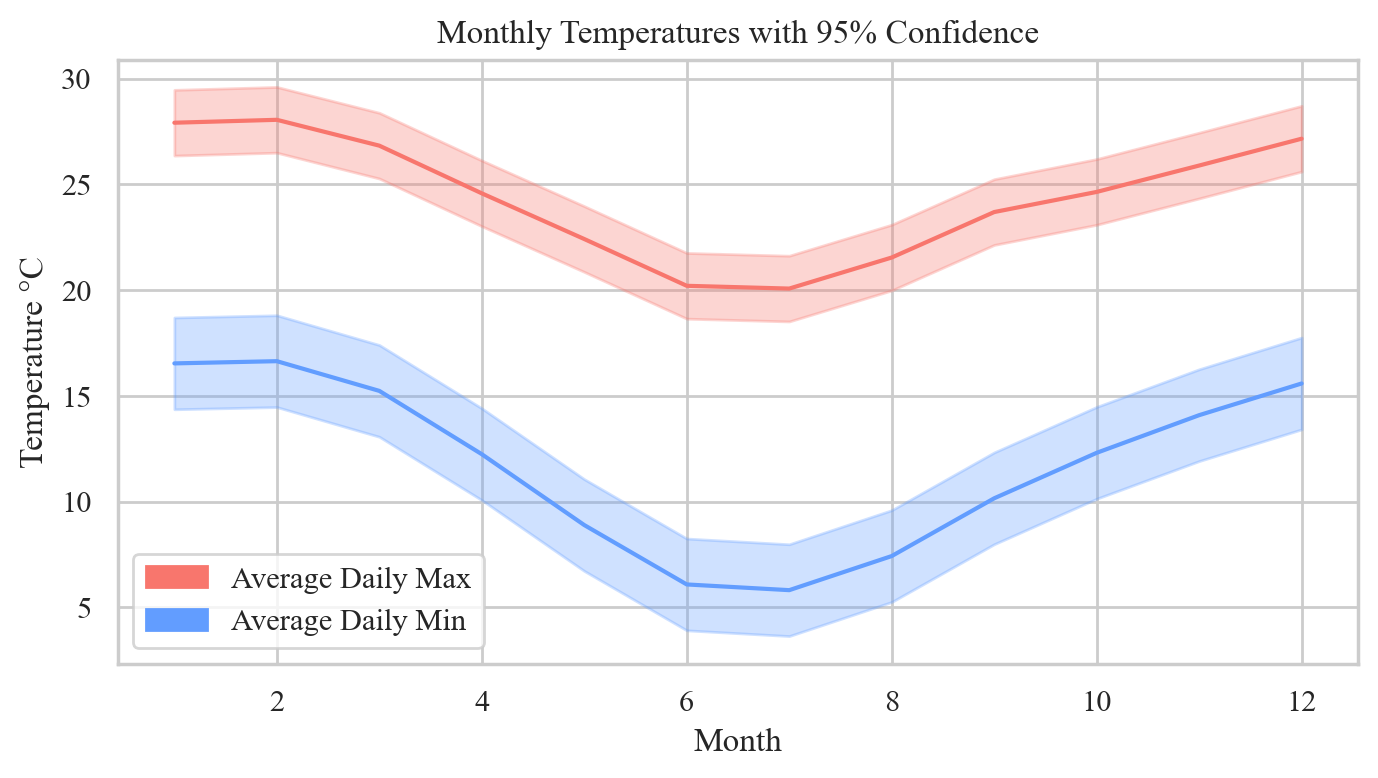

In [10]:
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.family'] = "Times New Roman"

x = max_temp.month
y = max_temp.avg_max_temp
ci = 1.96 * np.std(y)/np.sqrt(len(x))

x2 = min_temp.month
y2 = min_temp.avg_min_temp
ci2 = 1.96 * np.std(y2)/np.sqrt(len(x2))

fig, ax = plt.subplots()
ax.plot(x,y, color = '#f8766d')
ax.plot(x2,y2, color = '#629dff')
plt.title('Monthly Temperatures with 95% Confidence')
plt.ylabel('Temperature °C')
plt.xlabel('Month')
red_patch = mpatches.Patch(color='#f8766d', label='Average Daily Max')
blue_patch = mpatches.Patch(color='#629dff', label='Average Daily Min')
plt.legend(handles=[red_patch, blue_patch])
plt.savefig(f'{FIGURE_PATH}monthly_temperature.png',bbox_inches='tight',pad_inches = 0)
ax.fill_between(x, (y-ci), (y+ci), color='#f8766d', alpha=.3)
ax.fill_between(x2, (y2-ci2), (y2+ci2), color='#629dff', alpha=.3)
plt.savefig(f'{FIGURE_PATH}seasonal_temp_ci.png',bbox_inches='tight',pad_inches = 0)

In [11]:
# station_rain_1 =  read_from_drive('https://drive.google.com/file/d/1ZepOYjpJ1FiiYlKk_Fu3qy23kJZnPOMk/view?usp=sharing')
# station_rain_2 =  read_from_drive('https://drive.google.com/file/d/1ud9m84NP92H0_y9yIDJ2ncDa5NKEtZKr/view?usp=sharing')
# station_rain_3 =  read_from_drive('https://drive.google.com/file/d/1tzMSRfiA4641YZqyBwNVwqaoiXJ8C0bE/view?usp=sharing')
# station_rain_4 =  read_from_drive('https://drive.google.com/file/d/1SAuLMH45UI50-CK804KhYc33Sa_EmkkY/view?usp=sharing')


station_rain_1 =  pd.read_csv('/Users/connormcdonald/Desktop/Masters/MIT808/local_data/station_rainfall_1.csv')
station_rain_2 =  pd.read_csv('/Users/connormcdonald/Desktop/Masters/MIT808/local_data/station_rainfall_2.csv')
station_rain_3 =  pd.read_csv('/Users/connormcdonald/Desktop/Masters/MIT808/local_data/station_rainfall_3.csv')
station_rain_4 =  pd.read_csv('/Users/connormcdonald/Desktop/Masters/MIT808/local_data/station_rainfall_4.csv')

In [12]:
station_rain_total = station_rain_1.append(station_rain_2, ignore_index=True)

In [13]:
station_rain_total = station_rain_total.append(station_rain_3, ignore_index=True)

In [14]:
station_rain_total = station_rain_total.append(station_rain_4, ignore_index=True)

In [15]:
station_rain_total['decade'] = (10 * (station_rain_total['year'] // 10)).astype(str) + 's'

In [16]:
station_rain_total.head()
station_rain_total = station_rain_total[station_rain_total.rainfall < 4000]

In [17]:
station_rain_total.head()

,rainfall,station_id,year,decade
0,489.2,0511120_W,1950,1950s
1,640.9,0513768_W,1950,1950s
2,803.2,0518197_W,1950,1950s
3,275.5,0448419_W,1950,1950s
4,682.2,0006474_W,1950,1950s


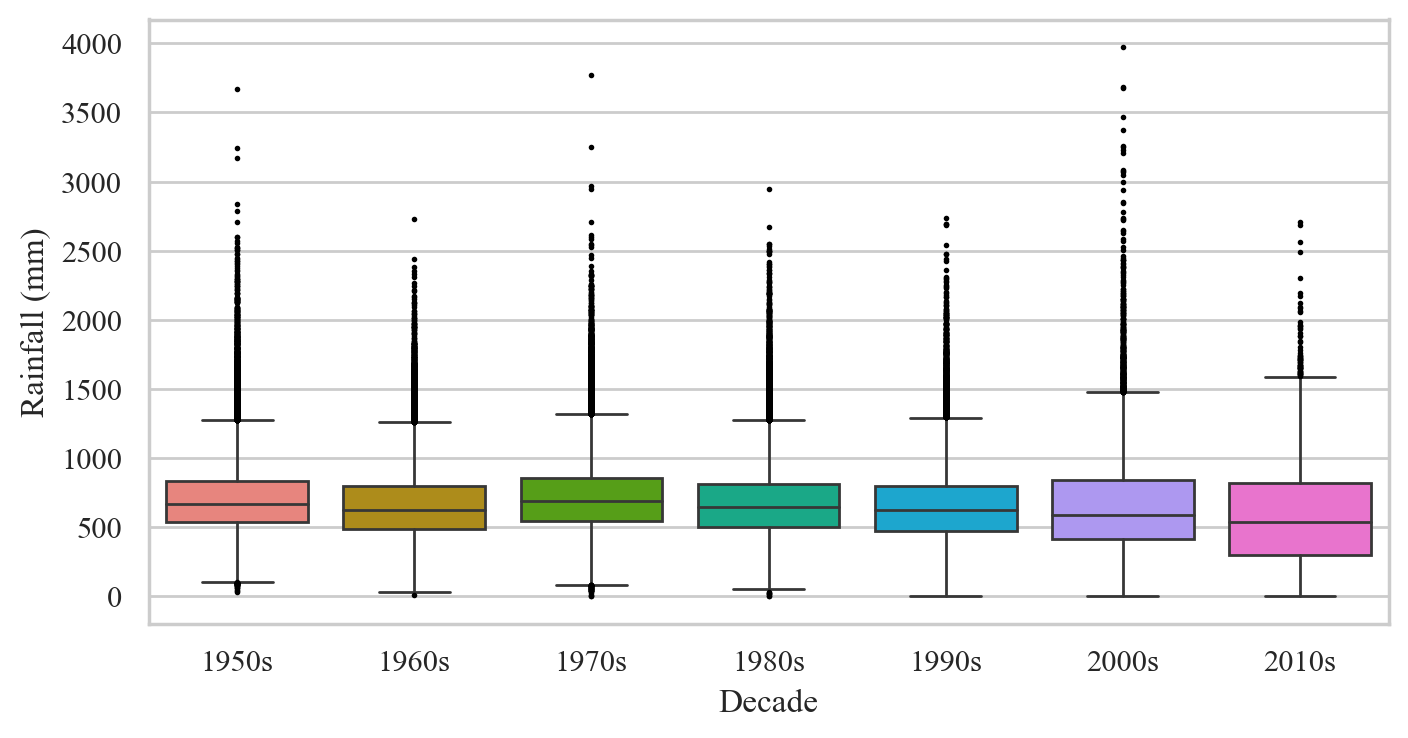

In [18]:
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.family'] = "Times New Roman"
palete = ['#f8766d', '#c59a03', '#54b402', '#02c094', '#00b6eb', '#a68afe', '#fb61d7']
flierprops = dict(marker='o', markerfacecolor='None', markersize=1,  markeredgecolor='black')
ax = sns.boxplot(x="decade", y="rainfall", data=station_rain_total, linewidth=1, flierprops = flierprops, palette=palete)
# plt.title('Annual Rainfall per Station')
plt.xlabel('Decade')
plt.ylabel('Rainfall (mm)')
plt.savefig(f'{FIGURE_PATH}rain_box.png',bbox_inches='tight',pad_inches = 0)

In [19]:
# monthly_temps = read_from_drive('https://drive.google.com/file/d/1WL26JgBiaz9fVjwLDNwQYpjNPiF1A1K9/view?usp=sharing')
monthly_temps = pd.read_csv('/Users/connormcdonald/Desktop/Masters/MIT808/local_data/temp_all_time.csv')
# monthly_temps = monthly_temps[monthly_temps.date >= '1990-01-01']

In [20]:
# monthly_rain = read_from_drive('https://drive.google.com/file/d/1Tsao1dx80j0WpvKBJslddyPIv7q1r3Vj/view?usp=sharing')
monthly_rain = pd.read_csv('/Users/connormcdonald/Desktop/Masters/MIT808/local_data/rainfall_all_time.csv')
# monthly_rain = monthly_rain[monthly_rain.date >= '1990-01-01']

In [21]:
monthly_rain['year'] = pd.DatetimeIndex(pd.to_datetime(monthly_rain['date'],format='%Y-%m-%d')).year
monthly_rain['datetime'] = pd.DatetimeIndex(pd.to_datetime(monthly_rain['date'],format='%Y-%m-%d'))

In [22]:
monthly_rain['decade'] = (10 * (monthly_rain['year'] // 10)).astype(str) + 's'
monthly_rain.head()

,avg_station_rainfall,date,year,datetime,decade
0,78.385825,1950-01-01,1950,1950-01-01,1950s
1,70.566421,1950-02-01,1950,1950-02-01,1950s
2,92.435749,1950-03-01,1950,1950-03-01,1950s
3,63.956701,1950-04-01,1950,1950-04-01,1950s
4,45.075972,1950-05-01,1950,1950-05-01,1950s


In [23]:
df = monthly_rain.join(monthly_temps.set_index('date'), on='date')
df.head()

,avg_station_rainfall,date,year,datetime,decade,avg_max_temp,avg_min_temp
0,78.385825,1950-01-01,1950,1950-01-01,1950s,27.930734,16.047463
1,70.566421,1950-02-01,1950,1950-02-01,1950s,28.886207,16.843775
2,92.435749,1950-03-01,1950,1950-03-01,1950s,27.612601,15.842091
3,63.956701,1950-04-01,1950,1950-04-01,1950s,24.248469,12.299630
4,45.075972,1950-05-01,1950,1950-05-01,1950s,21.654666,8.447018


In [24]:
df = df.set_index('datetime')
df.head()

,avg_station_rainfall,date,year,decade,avg_max_temp,avg_min_temp
datetime,,,,,,
1950-01-01,78.385825,1950-01-01,1950,1950s,27.930734,16.047463
1950-02-01,70.566421,1950-02-01,1950,1950s,28.886207,16.843775
1950-03-01,92.435749,1950-03-01,1950,1950s,27.612601,15.842091
1950-04-01,63.956701,1950-04-01,1950,1950s,24.248469,12.299630
1950-05-01,45.075972,1950-05-01,1950,1950s,21.654666,8.447018


In [25]:
df = df.iloc[:, [4,5]]
df.head()

,avg_max_temp,avg_min_temp
datetime,,
1950-01-01,27.930734,16.047463
1950-02-01,28.886207,16.843775
1950-03-01,27.612601,15.842091
1950-04-01,24.248469,12.299630
1950-05-01,21.654666,8.447018


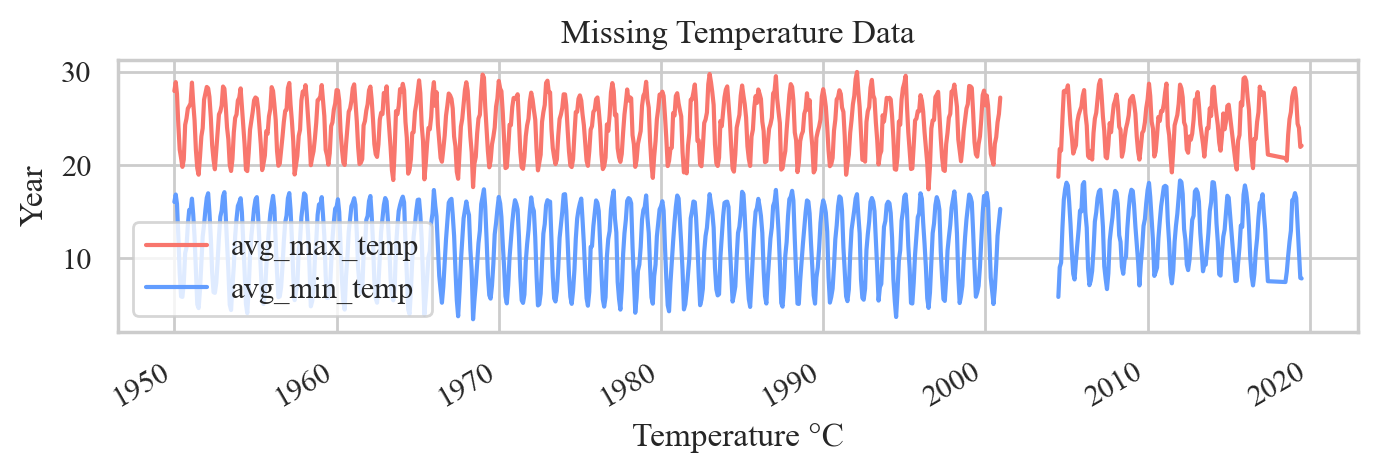

In [26]:
plt.rcParams["figure.figsize"] = [8, 2]
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.family'] = "Times New Roman"
df.plot(color = ['#f8766d', '#629dff'])
plt.title('Missing Temperature Data')
plt.ylabel('Year')
plt.xlabel('Temperature °C')
plt.legend(loc = 'lower left')
plt.savefig(f'{FIGURE_PATH}missing_data.png',bbox_inches='tight',pad_inches = 0)

In [27]:
avg_temps = read_from_drive('https://drive.google.com/file/d/1TRGETfhrn8AoKy6O3HR3_MX_zbIbrXUg/view?usp=sharing')
# avg_temps = pd.read_csv()
avg_temps.head()

,avg_max_temp,avg_min_temp,day_of_year
0,28.092652,16.030622,1
1,27.843989,16.036569,2
2,28.050850,16.040532,3
3,28.169310,16.096733,4
4,28.388974,16.108839,5


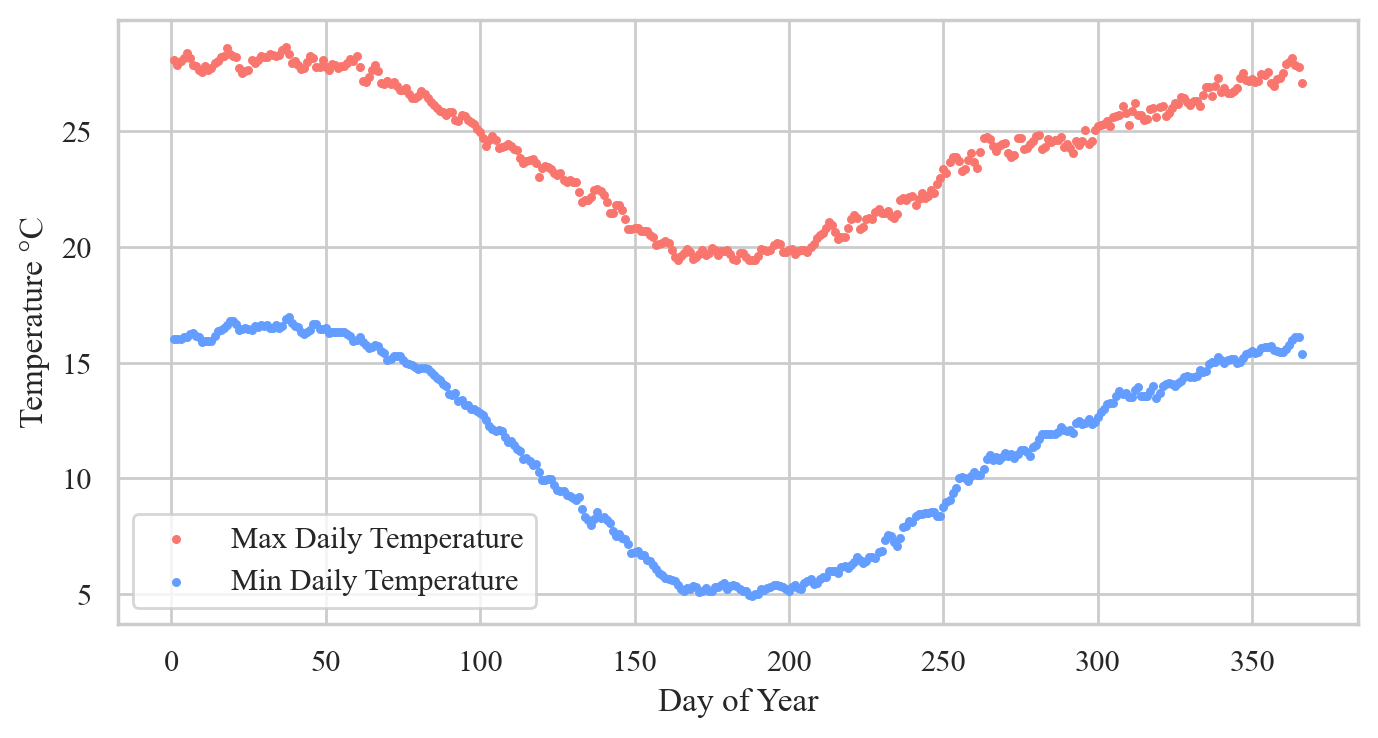

In [28]:
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.family'] = "Times New Roman"
plt.scatter(avg_temps.day_of_year, avg_temps.avg_max_temp, color = '#f8766d', label='Max Daily Temperature', s = 5)
plt.scatter(avg_temps.day_of_year, avg_temps.avg_min_temp, color = '#629dff', label='Min Daily Temperature', s = 5)
plt.ylabel('Temperature °C')
plt.xlabel('Day of Year')
# plt.title('Average Daily Temperatures by Day of Year')
plt.legend()
plt.savefig(f'{FIGURE_PATH}seasonal_temp2.png',bbox_inches='tight',pad_inches = 0)

In [29]:
stations_per_year = read_from_drive('https://drive.google.com/file/d/1H0W-m48vZiaIXKHU3NTCiv6hLYJ3RMaI/view?usp=sharing')

In [30]:
stations_per_year.head()

,station_count,year
0,5618,1990
1,5609,1991
2,5609,1992
3,5607,1993
4,5604,1994


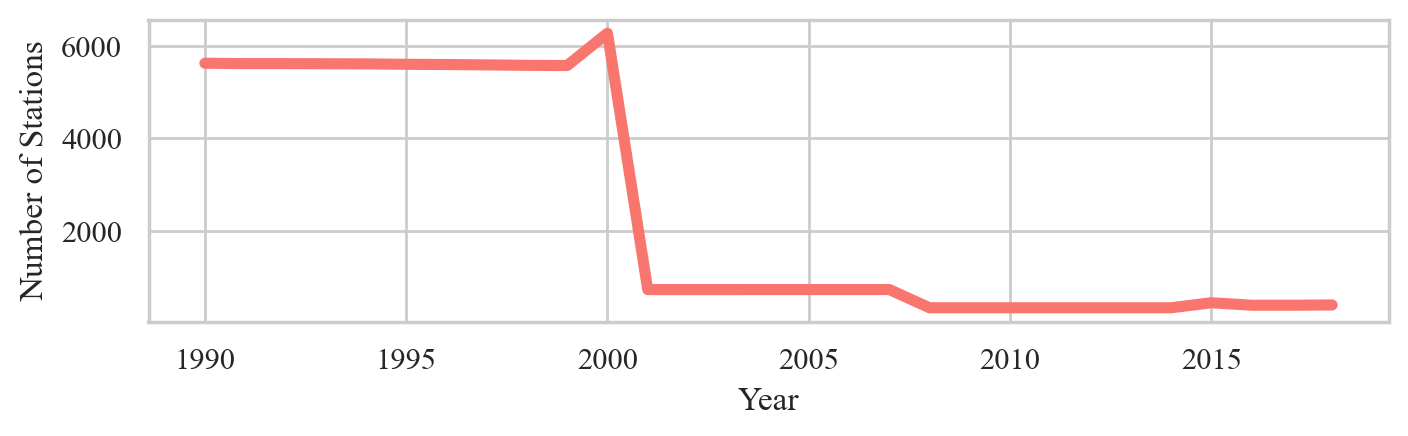

In [31]:
plt.rcParams["figure.figsize"] = [8, 2]
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.family'] = "Times New Roman"
plt.plot(stations_per_year.year, stations_per_year.station_count, color = '#f8766d', linewidth = 4, alpha = 1)
plt.ylabel('Number of Stations')
plt.xlabel('Year')
# plt.title('Average Daily Temperatures by Day of Year')
plt.savefig(f'{FIGURE_PATH}station_count.png',bbox_inches='tight',pad_inches = 0)

In [32]:
max_month_temps = read_from_drive('https://drive.google.com/file/d/1jemBNam6mg2UqLq643uFLh1qOJofsR1X/view?usp=sharing')

In [33]:
max_month_temps = max_month_temps[max_month_temps.year > 2014]
max_month_temps.head()

,max_high,max_low,month,year
126,32.6,20.4,1,2015
127,34.3,20.8,6,2015
128,35.8,18.5,7,2015
129,36.3,21.9,8,2015
130,39.9,21.3,9,2015


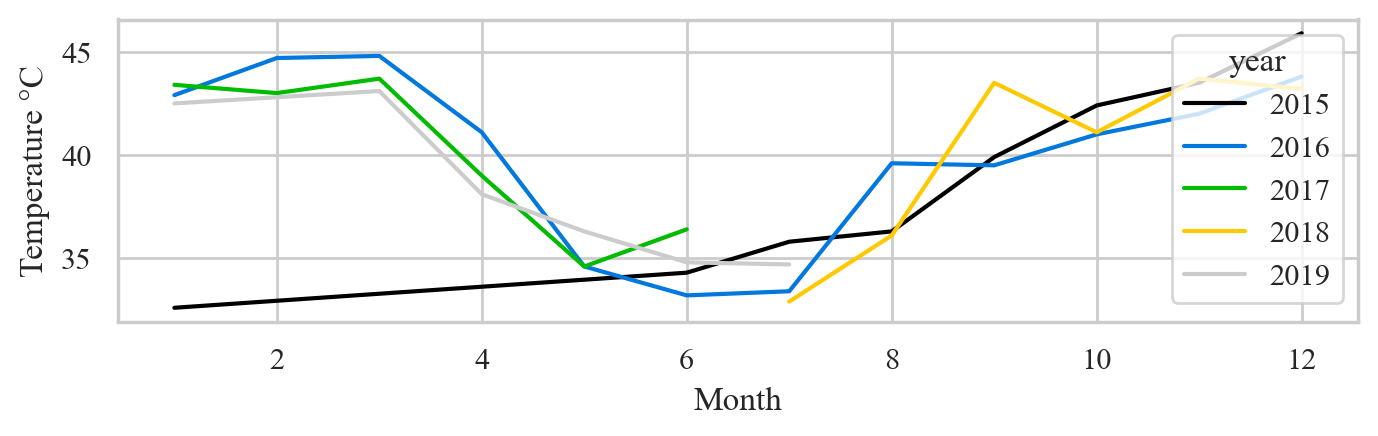

In [34]:
plt.rcParams["figure.figsize"] = [8, 2]
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.family'] = "Times New Roman"
sns.lineplot(data=max_month_temps, x = 'month', y = 'max_high', hue= 'year', palette='nipy_spectral')
plt.ylabel('Temperature °C')
plt.xlabel('Month')
plt.savefig(f'{FIGURE_PATH}max_temp.png',bbox_inches='tight',pad_inches = 0)

In [35]:
avg_high = read_from_drive('https://drive.google.com/file/d/1VaiLSXh77xkYCrpQorDJMHLY2SnMVC5E/view?usp=sharing')

In [36]:
avg_high = avg_high[avg_high.year > 2014]
avg_high.head()


,avg_high,month,year
126,26.468421,1,2015
127,20.371964,6,2015
128,19.526869,7,2015
129,22.630331,8,2015
130,23.216995,9,2015


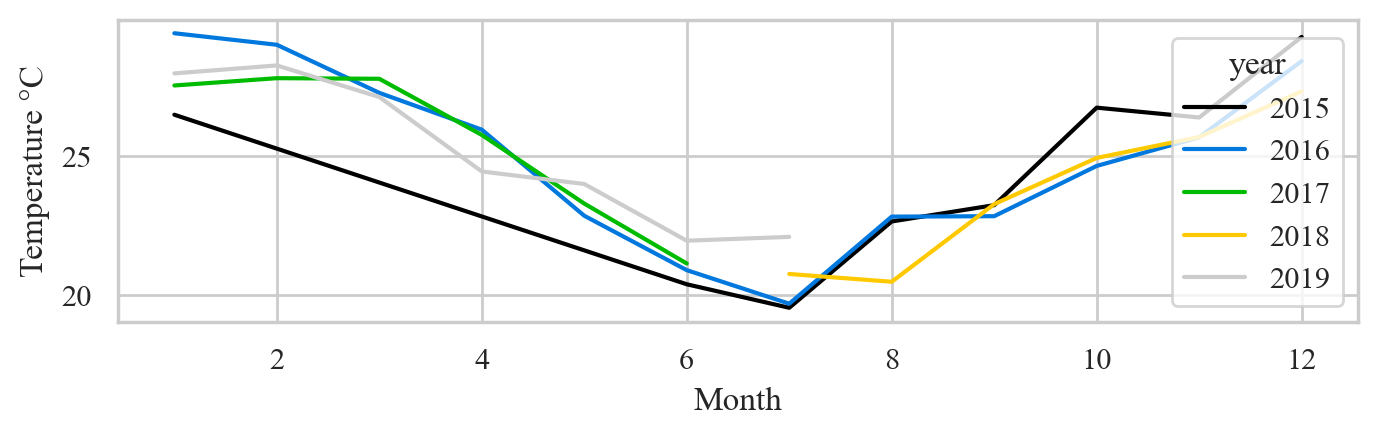

In [37]:
plt.rcParams["figure.figsize"] = [8, 2]
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.family'] = "Times New Roman"
sns.lineplot(data=avg_high, x = 'month', y = 'avg_high', hue= 'year', palette='nipy_spectral')
plt.ylabel('Temperature °C')
plt.xlabel('Month')
plt.savefig(f'{FIGURE_PATH}avg_temp_by_year.png',bbox_inches='tight',pad_inches = 0)

In [38]:
avg_rain = read_from_drive('https://drive.google.com/file/d/1pWkRFql5rT3gv96pQTCg1k1DGQb3jqGJ/view?usp=sharing')

In [39]:
annual_average = avg_rain.groupby(['year']).sum()

In [40]:
annual_average = annual_average.iloc[:,0]
annual_average.head()

year
2001    810.260926
2002    688.870022
2003    571.075008
2004    767.632493
2005    654.679985
Name: avg_rain, dtype: float64

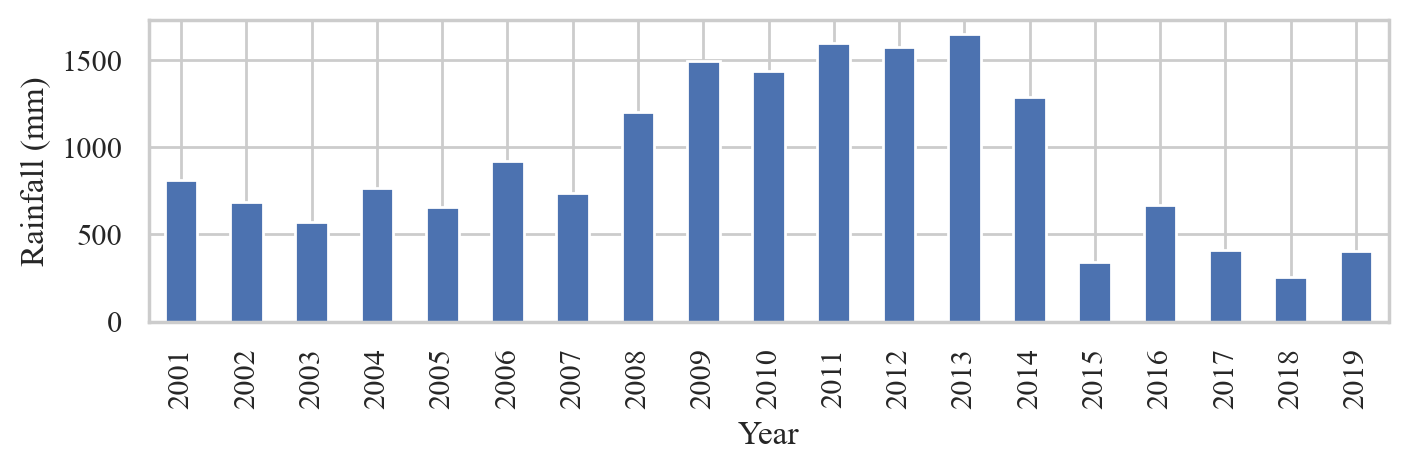

In [41]:
annual_average.plot.bar()
plt.ylabel('Rainfall (mm)')
plt.xlabel('Year')
plt.savefig(f'{FIGURE_PATH}avg_rain_bar.png',bbox_inches='tight',pad_inches = 0)

In [42]:
avg_rain = read_from_drive('https://drive.google.com/file/d/1pWkRFql5rT3gv96pQTCg1k1DGQb3jqGJ/view?usp=sharing')

In [43]:
avg_rain = avg_rain[avg_rain.year > 2014]
avg_rain.head()

,avg_rain,year,month
168,14.358631,2015,1
169,38.215026,2015,6
170,62.555065,2015,7
171,26.717662,2015,8
172,47.793041,2015,9


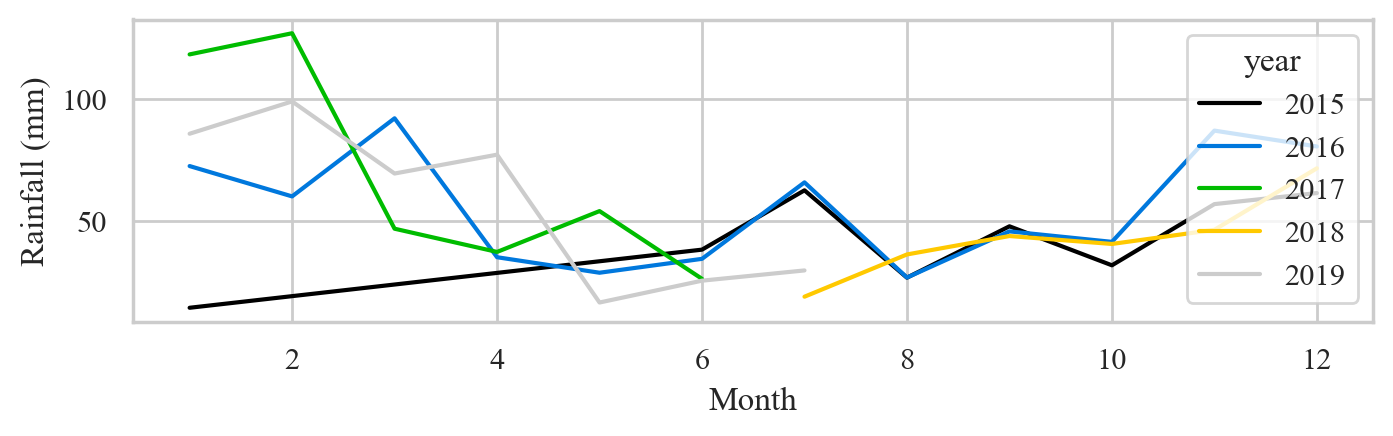

In [44]:
plt.rcParams["figure.figsize"] = [8, 2]
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.family'] = "Times New Roman"
sns.lineplot(data=avg_rain, x = 'month', y = 'avg_rain', hue= 'year', palette='nipy_spectral')
plt.ylabel('Rainfall (mm)')
plt.xlabel('Month')
plt.savefig(f'{FIGURE_PATH}avg_rain_by_year.png',bbox_inches='tight',pad_inches = 0)